Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/content/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(400, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


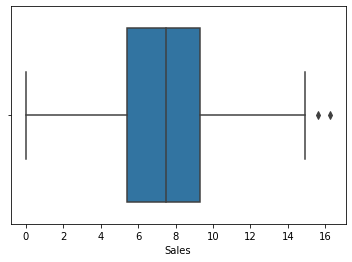

In [10]:
sns.boxplot(data.Sales)
plt.show()

In [12]:
print("Skewness :", data['Sales'].skew(), "Kurtoisis", data['Sales'].kurtosis())

Skewness : 0.18556036318721578 Kurtoisis -0.08087736743346197


The data is Skwed on the right
and the data has negative Kurtosis

In [15]:
corr = data.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [16]:
df=data.copy()

In [17]:
data.keys()

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban', 'US'])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [19]:
df.Sales.mean()

7.496325

In [25]:
df["Sales"]=df["Sales"].apply(lambda x: "Small" if x<=7.49 else "Large") 

In [26]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Large,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Large,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Large,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Small,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Small,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [27]:
X=df.iloc[:,1:]
y=df["Sales"]

In [28]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
y_train.value_counts()

Small    166
Large    154
Name: Sales, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DTC=DecisionTreeClassifier(criterion='entropy')

In [37]:
model=DTC.fit(X_train,y_train)

In [38]:
y_pred=model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
accuracy_score(y_test,y_pred)

0.725

In [41]:
confusion_matrix(y_test,y_pred)

array([[31, 14],
       [ 8, 27]])

Conclusion : As seen in the confusion matrix of Test data 57 instances are presdected correctly and 22 instances are not

In [49]:
from sklearn import tree

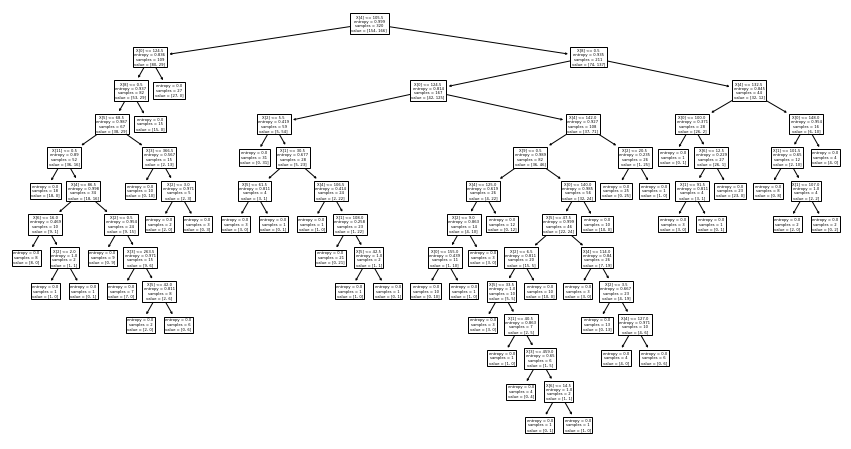

In [52]:
plt.figure(figsize=(15,8))
tree.plot_tree(model)
plt.show()

In [53]:
features=list(df.columns)

In [58]:
cn=list(df.Sales.unique())

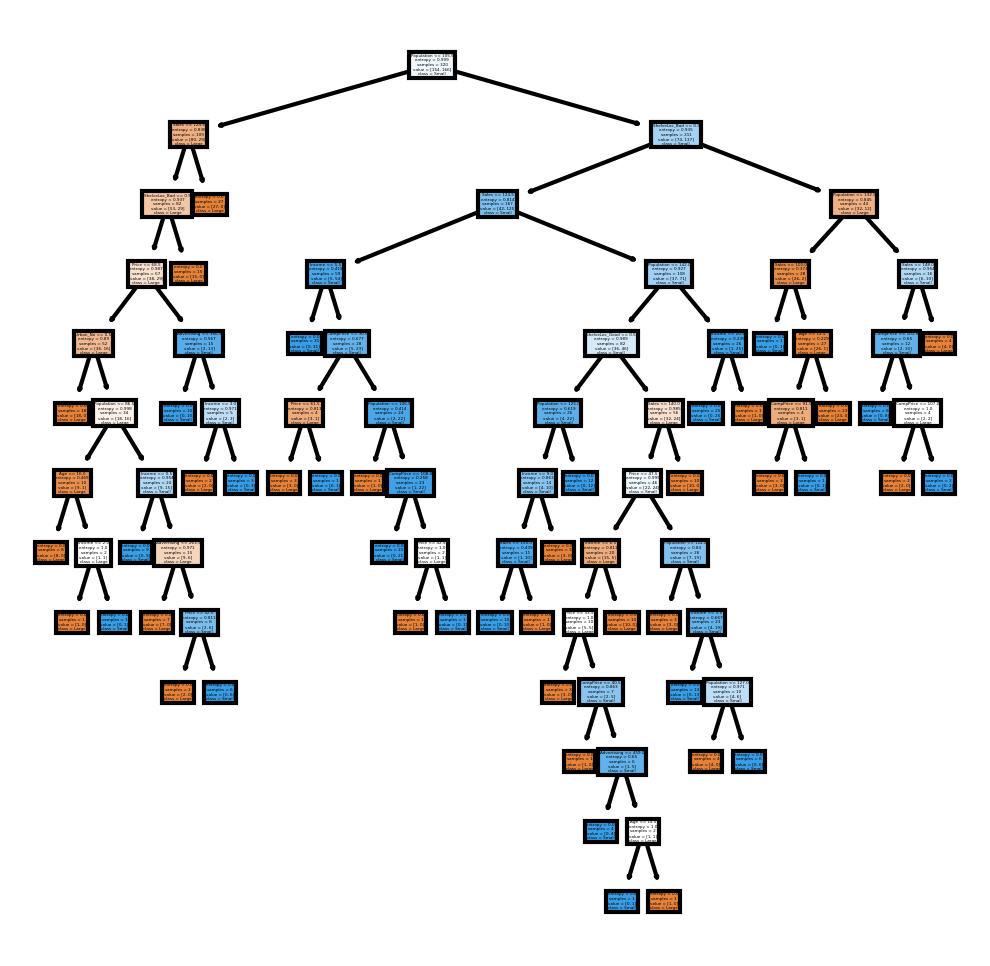

In [60]:
fig,axes=plt.subplots(1,1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=features,class_names=cn,filled=True)
plt.show()

In [61]:
model.feature_importances_

array([0.15963962, 0.07163261, 0.14438562, 0.04259653, 0.27016001,
       0.10910424, 0.02382221, 0.        , 0.10911397, 0.03078562,
       0.        , 0.03875957, 0.        , 0.        ])

In [64]:
df_imp=pd.DataFrame({'Feature': list(X_train.columns),'Importance': model.feature_importances_}).sort_values('Importance', ascending = False)

In [65]:
df_imp

,Feature,Importance
4,Price,0.270160
0,CompPrice,0.159640
2,Advertising,0.144386
8,ShelveLoc_Good,0.109114
5,Age,0.109104
1,Income,0.071633
3,Population,0.042597
11,Urban_Yes,0.038760
9,ShelveLoc_Medium,0.030786
6,Education,0.023822
